# O poder da estatística descritiva e Isolation Forest

**Etapas**<br>
<br>
• Passo 0  - Assistir aulas anteriores <br>
• Passo 1  - Carregar bibiotecas<br>
• Passo 2  - Carregar base de dados<br>
• Passo 3  - Tratamento, entendimento e descrição dos dados<br>

# Passo 1 - Caregar as bibliotecas

In [281]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from matplotlib.patches import Rectangle
%matplotlib inline

In [282]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [456]:
import os
os.chdir('C:\\Users\\dalto\\OpM na Prática\\Python\\Base de Dados')

df = pd.read_csv("mini_indice_D1.csv", sep = ";")

In [284]:
df

,Data,Abertura,Maxima,Minima,Fechamento
0,17/05/2005,73165.43,73912.02,72269.53,73673.11
1,18/05/2005,73613.38,75106.56,73613.38,74807.92
2,19/05/2005,73912.02,74807.92,73882.16,74807.92
3,20/05/2005,74658.61,74658.61,73702.98,73912.02
4,23/05/2005,74210.65,74210.65,72717.48,72717.48
...,...,...,...,...,...
3747,13/07/2020,100750.00,101040.00,98300.00,98300.00
3748,14/07/2020,99195.00,100685.00,98360.00,100640.00
3749,15/07/2020,101805.00,102295.00,100810.00,102045.00
3750,16/07/2020,101360.00,101630.00,100230.00,100885.00


# Passo 3 - Tratamento, entendimento e descrição dos dados

In [285]:
df["Data"] = pd.to_datetime(df["Data"]).dt.normalize()

df = df.set_index("Data")

In [286]:
df.head()

,Abertura,Maxima,Minima,Fechamento
Data,,,,
2005-05-17,73165.43,73912.02,72269.53,73673.11
2005-05-18,73613.38,75106.56,73613.38,74807.92
2005-05-19,73912.02,74807.92,73882.16,74807.92
2005-05-20,74658.61,74658.61,73702.98,73912.02
2005-05-23,74210.65,74210.65,72717.48,72717.48


In [287]:
per = 1

df["Lag1"] = df["Fechamento"].shift(per)

In [288]:
# dummy para saber se o dia pe de alta ou baixa

df["highLow"] = np.where(df["Fechamento"] > df["Lag1"], 1, 0)

df.head(10)

,Abertura,Maxima,Minima,Fechamento,Lag1,highLow
Data,,,,,,
2005-05-17,73165.43,73912.02,72269.53,73673.11,NaN,0
2005-05-18,73613.38,75106.56,73613.38,74807.92,73673.11,1
2005-05-19,73912.02,74807.92,73882.16,74807.92,74807.92,0
2005-05-20,74658.61,74658.61,73702.98,73912.02,74807.92,0
2005-05-23,74210.65,74210.65,72717.48,72717.48,73912.02,0
2005-05-24,72269.53,73792.57,72000.76,73673.11,72717.48,1
2005-05-25,73464.07,74180.79,73225.16,73613.38,73673.11,0
2005-05-27,74449.56,76151.78,74449.56,75703.83,73613.38,1
2005-05-30,75853.14,76898.36,75853.14,76360.82,75703.83,1


In [289]:
#df["highLow"].value_counts(normalize=True)*100
df["highLow"].mean()

0.5119936034115139

In [290]:
df["Retorno"] = df["Fechamento"].pct_change(per)

df.head()

,Abertura,Maxima,Minima,Fechamento,Lag1,highLow,Retorno
Data,,,,,,,
2005-05-17,73165.43,73912.02,72269.53,73673.11,NaN,0,NaN
2005-05-18,73613.38,75106.56,73613.38,74807.92,73673.11,1,0.015403
2005-05-19,73912.02,74807.92,73882.16,74807.92,74807.92,0,0.000000
2005-05-20,74658.61,74658.61,73702.98,73912.02,74807.92,0,-0.011976
2005-05-23,74210.65,74210.65,72717.48,72717.48,73912.02,0,-0.016162


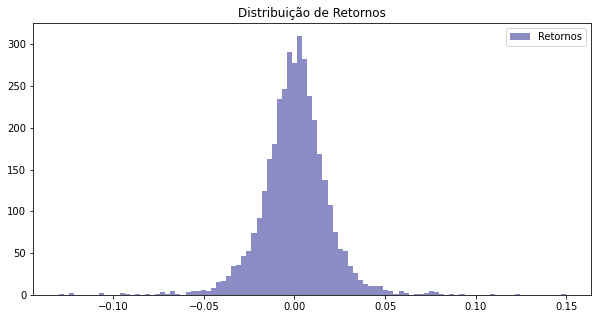

In [291]:
plt.figure(figsize = (10.,5))
plt.hist(df["Retorno"], bins = 100
        , alpha = 0.45
        , histtype = "stepfilled"
        , color = "navy"
        , edgecolor = "none"
        , label = "Retornos")

plt.legend()
plt.title("Distribuição de Retornos");

In [292]:
df["Retorno"].describe()

count    3751.000000
mean        0.000262
std         0.018516
min        -0.130041
25%        -0.009340
50%         0.000563
75%         0.010194
max         0.149722
Name: Retorno, dtype: float64

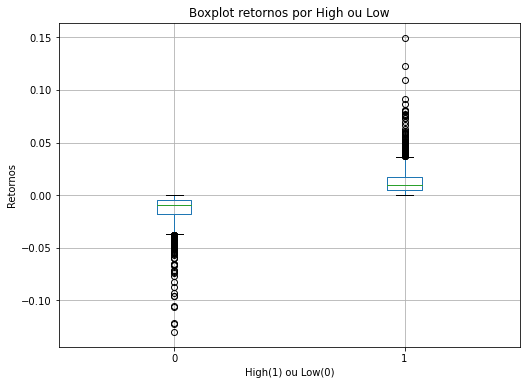

In [293]:
df.boxplot(by = "highLow", column = ["Retorno"],  figsize = (8,6)) #grid = False,
plt.title("Boxplot retornos por High ou Low")
plt.suptitle("") # para eliminar o título padrão do pandas
plt.ylabel("Retornos")
plt.xlabel("High(1) ou Low(0)")
plt.show()

In [294]:
df["Alvo"] = df["Retorno"].shift(-per)

df["AlvoBin"] = np.where(df['Alvo'] > 0, 1, 0)

In [295]:
df.head(10)

,Abertura,Maxima,Minima,Fechamento,Lag1,highLow,Retorno,Alvo,AlvoBin
Data,,,,,,,,,
2005-05-17,73165.43,73912.02,72269.53,73673.11,NaN,0,NaN,0.015403,1
2005-05-18,73613.38,75106.56,73613.38,74807.92,73673.11,1,0.015403,0.000000,0
2005-05-19,73912.02,74807.92,73882.16,74807.92,74807.92,0,0.000000,-0.011976,0
2005-05-20,74658.61,74658.61,73702.98,73912.02,74807.92,0,-0.011976,-0.016162,0
2005-05-23,74210.65,74210.65,72717.48,72717.48,73912.02,0,-0.016162,0.013142,1
2005-05-24,72269.53,73792.57,72000.76,73673.11,72717.48,1,0.013142,-0.000811,0
2005-05-25,73464.07,74180.79,73225.16,73613.38,73673.11,0,-0.000811,0.028398,1
2005-05-27,74449.56,76151.78,74449.56,75703.83,73613.38,1,0.028398,0.008678,1
2005-05-30,75853.14,76898.36,75853.14,76360.82,75703.83,1,0.008678,-0.008995,0


In [296]:
# Agrupa os dias de acordo com retorno atual e futuro e calcula seu percentuak
# depois o separa em quadrantes 

q1 = round(np.sum((df.Retorno >= 0) & (df.Alvo >= 0))/ df["Retorno"].describe()[0]*100,1)
q2 = round(np.sum((df.Retorno < 0) & (df.Alvo > 0))/ df["Retorno"].describe()[0]*100,1)
q3 = round(np.sum((df.Retorno < 0) & (df.Alvo < 0))/ df["Retorno"].describe()[0]*100,1)
q4 = round(np.sum((df.Retorno > 0) & (df.Alvo <= 0))/ df["Retorno"].describe()[0]*100,1)

In [297]:
q4

25.9

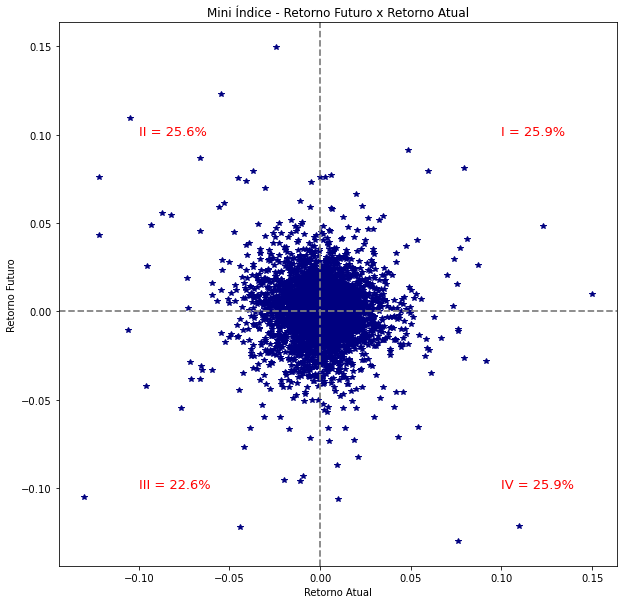

In [298]:
plt.figure(figsize = (10,10))
plt.plot(df["Retorno"], df["Alvo"], "*", color = "navy", label = "Aleatório")
setup = dict(size = 13, color ="red")
setup2 = dict(color = "gray", linestyle = "--", linewidth = 1.75)
plt.axvline(0, **setup2)
plt.axhline(0, **setup2)
plt.text(0.10, 0.10, ("I = " + str(q1) + "%"), **setup)
plt.text(-0.10, 0.10, ("II = " + str(q2) + "%"), **setup)
plt.text(-0.10, -0.10, ("III = " + str(q3) + "%"), **setup)
plt.text(0.10, -0.10, ("IV = " + str(q4) + "%"), **setup)
plt.ylabel("Retorno Futuro")
plt.xlabel("Retorno Atual")
plt.title("Mini Índice - Retorno Futuro x Retorno Atual");

In [299]:
# Calculando a magnitude de 2 desvios padrão
dpx2 = round((df["Retorno"].describe()[1] + 2*df["Retorno"].describe()[2]), 5)

dpx2

0.03729

In [300]:
np.sum((df.Retorno <= dpx2) & (df.Retorno >= -dpx2)
      & (df.Alvo <= dpx2) & (df.Alvo >= -dpx2))/df.shape[0]


0.9216417910447762

In [301]:
q1Out = round(np.sum(((df.Retorno >= dpx2) & (df.Alvo >= 0))
                     | ((df.Retorno >= 0) & (df.Alvo >= dpx2)))/df["Retorno"].describe()[0]*100, 1)
q2Out = round(np.sum(((df.Retorno < -dpx2) & (df.Alvo >= 0))
                     | ((df.Retorno < 0) & (df.Alvo >= dpx2)))/df["Retorno"].describe()[0]*100, 1)
q3Out = round(np.sum(((df.Retorno < 0) & (df.Alvo < -dpx2))
                     | ((df.Retorno <-dpx2) & (df.Alvo < 0)))/df["Retorno"].describe()[0]*100, 1)
q4Out = round(np.sum(((df.Retorno > dpx2) & (df.Alvo < 0))
                     | ((df.Retorno > 0) & (df.Alvo < -dpx2)))/df["Retorno"].describe()[0]*100, 1)

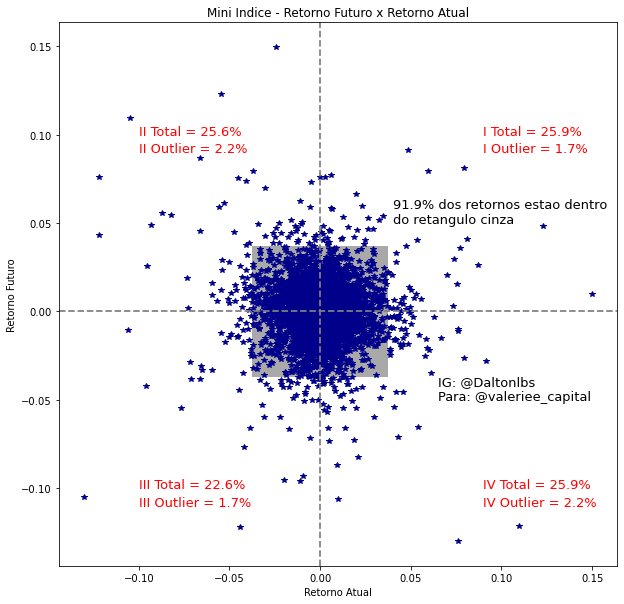

In [302]:
plt.figure(figsize = (10,10))
plt.plot(df["Retorno"], df["Alvo"], "*", color = "darkblue", label = "aleatorio")

setup = dict(size = 13, color = "red")
setup2 = dict(color = "gray", linestyle = "--", linewidth = 1.75)

setup3 = dict(size = 13, color = "black")
retangulo = plt.gca()
retangulo.add_patch(Rectangle((-dpx2 , -dpx2), 2*dpx2, 2*dpx2, facecolor = "darkgray"))

plt.axvline(0, **setup2)
plt.axhline(0, **setup2)

plt.text(0.04, 0.05, ("91.9% dos retornos estao dentro\ndo retangulo cinza"), **setup3);
plt.text(0.065, -0.05, ("IG: @Daltonlbs\nPara: @valeriee_capital "), **setup3);

plt.text(0.09, 0.10, ("I Total = " + str(q1) + "%"), **setup);
plt.text(-0.10, 0.10, ("II Total = " + str(q2) + "%"), **setup);
plt.text(-0.10, -0.10, ("III Total = " + str(q3) + "%"), **setup);
plt.text(0.09, -0.10, ("IV Total = " + str(q4)) + "%", **setup);

plt.text(0.09, 0.09, ("I Outlier = " + str(q1Out) + "%"), **setup);
plt.text(-0.10, 0.09, ("II Outlier = " + str(q2Out) + "%"), **setup);
plt.text(-0.10, -0.11, ("III Outlier = " + str(q3Out) + "%"), **setup);
plt.text(0.09, -0.11, ("IV Outlier = " + str(q4Out)) + "%", **setup);

plt.ylabel("Retorno Futuro")
plt.xlabel("Retorno Atual")
plt.title("Mini Indice - Retorno Futuro x Retorno Atual");

In [303]:
df["HiLoP1"] = df["highLow"].shift(per).fillna(0).apply(int)

df["HiLoP1"].dtypes

dtype('int64')

In [304]:
df.head()

,Abertura,Maxima,Minima,Fechamento,Lag1,highLow,Retorno,Alvo,AlvoBin,HiLoP1
Data,,,,,,,,,,
2005-05-17,73165.43,73912.02,72269.53,73673.11,NaN,0,NaN,0.015403,1,0
2005-05-18,73613.38,75106.56,73613.38,74807.92,73673.11,1,0.015403,0.000000,0,0
2005-05-19,73912.02,74807.92,73882.16,74807.92,74807.92,0,0.000000,-0.011976,0,1
2005-05-20,74658.61,74658.61,73702.98,73912.02,74807.92,0,-0.011976,-0.016162,0,0
2005-05-23,74210.65,74210.65,72717.48,72717.48,73912.02,0,-0.016162,0.013142,1,0


In [305]:
df["Rr"] = df["HiLoP1"].apply(str).str.cat(df["highLow"].apply(str), "-")

In [306]:
df.head()

,Abertura,Maxima,Minima,Fechamento,Lag1,highLow,Retorno,Alvo,AlvoBin,HiLoP1,Rr
Data,,,,,,,,,,,
2005-05-17,73165.43,73912.02,72269.53,73673.11,NaN,0,NaN,0.015403,1,0,0-0
2005-05-18,73613.38,75106.56,73613.38,74807.92,73673.11,1,0.015403,0.000000,0,0,0-1
2005-05-19,73912.02,74807.92,73882.16,74807.92,74807.92,0,0.000000,-0.011976,0,1,1-0
2005-05-20,74658.61,74658.61,73702.98,73912.02,74807.92,0,-0.011976,-0.016162,0,0,0-0
2005-05-23,74210.65,74210.65,72717.48,72717.48,73912.02,0,-0.016162,0.013142,1,0,0-0


In [307]:
#df["Rr"].value_counts()
df["Rr"].value_counts(normalize=True)*100

0-1    25.879531
1-0    25.852878
1-1    25.319829
0-0    22.947761
Name: Rr, dtype: float64

In [308]:
# Mostra a média do retorno futuro para cada evento

print(round(df[df["Rr"] == "0-1"].mean()["Alvo"]*100,2))
print(round(df[df["Rr"] == "1-0"].mean()["Alvo"]*100,2))
print(round(df[df["Rr"] == "1-1"].mean()["Alvo"]*100,2))
print(round(df[df["Rr"] == "0-0"].mean()["Alvo"]*100,2))

-0.02
0.04
-0.03
0.13


In [309]:
print("")
print(round(df[df["Rr"] == "0-1"].mean()["AlvoBin"]*100-50,2),"%")
print(round(df[df["Rr"] == "1-0"].mean()["AlvoBin"]*100-50,2),"%")
print(round(df[df["Rr"] == "1-1"].mean()["AlvoBin"]*100-50,2),"%")
print(round(df[df["Rr"] == "0-0"].mean()["AlvoBin"]*100-50,2),"%")


2.01 %
1.34 %
-3.16 %
4.94 %


In [310]:

print(round(df[df["Rr"] == "0-1"].sum()["Alvo"]*100,2))
print(round(df[df["Rr"] == "1-0"].sum()["Alvo"]*100,2))
print(round(df[df["Rr"] == "1-1"].sum()["Alvo"]*100,2))
print(round(df[df["Rr"] == "0-0"].sum()["Alvo"]*100,2))

-23.67
36.92
-31.23
116.23


In [311]:
acc00 = np.where(df["Rr"] == "0-0", df["Alvo"], 0)

In [312]:
acc00

array([0.01540331, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ])

In [313]:
# Criando um dataframe para a análise

df00 = pd.DataFrame(acc00, columns = ["Acc00"], index = df.index.values)

In [314]:
# Para fazer um conditional plot

df00.index.name = "Date"
df00.reset_index(inplace = True)

df00["Date"] = pd.to_datetime(df00["Date"])

In [315]:
df00 = df00.resample("M", on = "Date").sum() # Agregando por mês


In [316]:
df00.loc[:, "Retorno_acumulado"] = df00["Acc00"].cumsum()*100

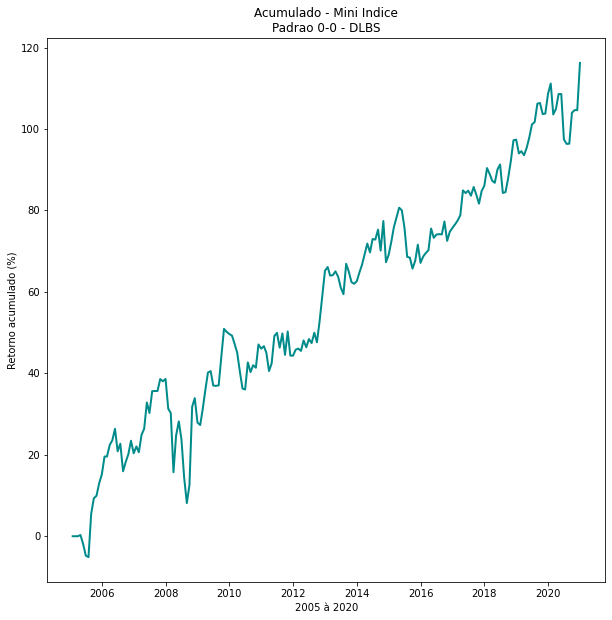

In [317]:
with plt.style.context("seaborn-deep"):
    plt.figure(figsize = (10,10))
    plt.plot(df00.index.values, df00["Retorno_acumulado"], color = "darkcyan", linewidth = 2)
    plt.xlabel("2005 à 2020")
    plt.ylabel("Retorno acumulado (%)")
    #plt.text("2006-07-01", 85, ("Simples momentum"), **setup3)
    #plt.text("2006-07-01", 75, ("IG: @leandrowar\nYT: Outspoken Market"), **setup3)
    plt.title("Acumulado - Mini Indice\nPadrao 0-0 - DLBS")

In [318]:
df2dp = df[(df["Retorno"] >= dpx2) | (df["Retorno"] <= -dpx2)]

In [319]:
df2dp.shape

(165, 11)

In [320]:
df2dp.head()

,Abertura,Maxima,Minima,Fechamento,Lag1,highLow,Retorno,Alvo,AlvoBin,HiLoP1,Rr
Data,,,,,,,,,,,
2005-10-20,85837.71,85978.33,80100.19,80437.70,84712.71,0,-0.050465,0.027972,1,1,1-0
2006-05-25,96820.72,100411.60,96022.75,100305.21,96288.74,1,0.041713,0.027844,1,1,1-1
2006-05-30,100411.60,100810.59,97193.11,97379.31,101289.37,0,-0.038603,0.008468,1,0,0-0
2006-12-06,93894.82,94293.81,89027.19,89133.58,93096.85,0,-0.042571,-0.017607,0,0,0-0
2006-06-16,90700.87,92007.80,89080.28,91223.64,87930.18,1,0.037455,-0.012034,0,1,1-1


In [321]:
round(df2dp["Rr"].value_counts()/df2dp.shape[0]*100,2)

0-1    28.48
1-0    25.45
0-0    24.85
1-1    21.21
Name: Rr, dtype: float64

In [322]:
print(round(df2dp[df2dp["Rr"] == "0-1"].mean()["Alvo"]*100,2))
print(round(df2dp[df2dp["Rr"] == "1-1"].mean()["Alvo"]*100,2))
print(round(df2dp[df2dp["Rr"] == "0-0"].mean()["Alvo"]*100,2))
print(round(df2dp[df2dp["Rr"] == "1-0"].mean()["Alvo"]*100,2))

-0.46
-0.29
0.46
0.82


In [323]:
print("0-1 ", round(df2dp[df2dp["Rr"] == "0-1"].mean()["AlvoBin"]*100-50,2),"%")
print("1-1 ", round(df2dp[df2dp["Rr"] == "1-1"].mean()["AlvoBin"]*100-50,2),"%")
print("0-0 " ,round(df2dp[df2dp["Rr"] == "0-0"].mean()["AlvoBin"]*100-50,2),"%")
print("1-0 ", round(df2dp[df2dp["Rr"] == "1-0"].mean()["AlvoBin"]*100-50,2),"%")

0-1  -5.32 %
1-1  -10.0 %
0-0  6.1 %
1-0  16.67 %


In [324]:
print("0-1 ", round(df2dp[df2dp["Rr"] == "0-1"].sum()["Alvo"]*100,2))
print("1-1 ", round(df2dp[df2dp["Rr"] == "1-1"].sum()["Alvo"]*100,2))
print("0-0 ", round(df2dp[df2dp["Rr"] == "0-0"].sum()["Alvo"]*100,2))
print("1-0 ", round(df2dp[df2dp["Rr"] == "1-0"].sum()["Alvo"]*100,2))

0-1  -21.84
1-1  -10.22
0-0  18.76
1-0  34.34


In [325]:
acc10 = np.where(df2dp["Rr"] == "1-0", df2dp["Alvo"], 0)

In [326]:
df10 = pd.DataFrame(acc10, columns = ["Acc10"], index = df2dp.index.values)

In [327]:
df10.index.name = "Date"
df10.reset_index(inplace = True)

df10["Date"] = pd.to_datetime(df10["Date"])

In [328]:
df10 = df10.resample("M", on ="Date").sum()

df10.loc[:, "RetornoAcum"] = df10["Acc10"].cumsum()*100

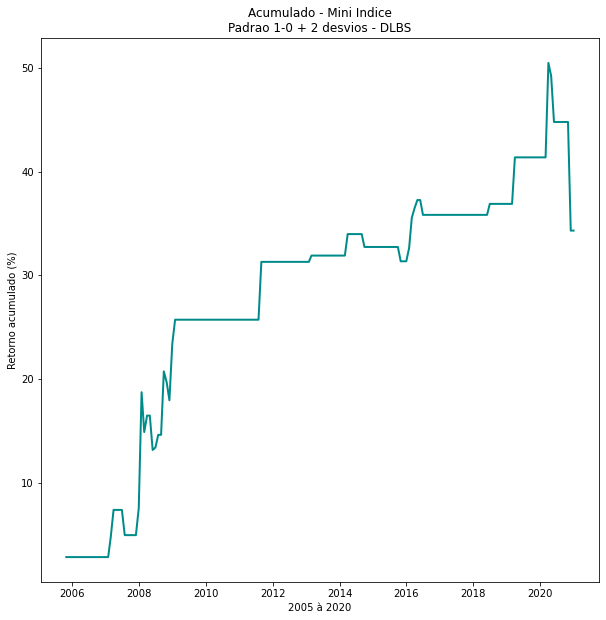

In [329]:
with plt.style.context("seaborn-deep"):
    plt.figure(figsize = (10,10))
    plt.plot(df10.index.values, df10["RetornoAcum"], color = "darkcyan", linewidth = 2)
    plt.xlabel("2005 à 2020")
    plt.ylabel("Retorno acumulado (%)")
    #plt.text("2006-07-01", 85, ("Simples momentum"), **setup3)
    #plt.text("2006-07-01", 75, ("IG: @leandrowar\nYT: Outspoken Market"), **setup3)
    plt.title("Acumulado - Mini Indice\nPadrao 1-0 + 2 desvios - DLBS")

In [330]:
print(df["Rr"].value_counts())
print("")
print(df2dp["Rr"].value_counts())

0-1    971
1-0    970
1-1    950
0-0    861
Name: Rr, dtype: int64

0-1    47
1-0    42
0-0    41
1-1    35
Name: Rr, dtype: int64


# Passo 4 - Construção dos alvos e variáveis

In [331]:
# variação em pontos do alvo

df["Pontos"] = (df["Fechamento"] - df["Fechamento"].shift(1))
df["Pontos"] = df["Pontos"].shift(-1)

In [332]:
# Construção das Variáveis

# Desvio Padrão de 5 dias
df["std5"] = df["Fechamento"].rolling(5).std()

# Desvio Padrão de 10 dias
df["std10"] = df["Fechamento"].rolling(10).std()

# Desvio Padrão de 15 dias
df["std15"] = df["Fechamento"].rolling(15).std()

# Proporção do corpo do candle em relação ao range do dia
df["prop"] = (df["Fechamento"]-df["Abertura"])/(df["Maxima"]-df["Minima"])

# Direção do dia atual
df["dirD"] = np.where(df["Fechamento"] > df["Abertura"], '1', '0')

# Direção D-1
df["dirD-1"] = df["dirD"].shift(1)

# Direção D-2
df["dirD-2"] = df["dirD"].shift(2)

# Direção D-3
df["dirD-3"] = df["dirD"].shift(3)

# Média móvel de 15 dias dp5
df["MMstd5"] = df["std5"].rolling(15).mean()

# Média móvel de 15 dias dp10
df["MMstd10"] = df["std10"].rolling(15).mean()

# Média móvel de 15 dias dp15
df["MMstd15"] = df["std15"].rolling(15).mean()

# RSLstd5
df["RSLstd5"] = (df["std5"]/df["std5"].rolling(15).mean())-1
# RSLstd10
df["RSLstd10"] = (df["std10"]/df["std10"].rolling(15).mean())-1
# RSLstd15
df["RSLstd15"] = (df["std15"]/df["std15"].rolling(15).mean())-1

In [333]:
dff = df.dropna(axis = 0)

dff = dff.drop(["std5", "std10", "std15", "MMstd5", "MMstd10", "MMstd15"], axis = 1)

In [334]:
dff["RSLstd5"] = pd.qcut(dff["RSLstd5"], 10, labels = False)
dff["RSLstd10"] = pd.qcut(dff["RSLstd10"], 10, labels = False)
dff["RSLstd15"] = pd.qcut(dff["RSLstd15"], 10, labels = False)

In [335]:
dff

,Abertura,Maxima,Minima,Fechamento,Lag1,highLow,Retorno,Alvo,AlvoBin,HiLoP1,Rr,Pontos,prop,dirD,dirD-1,dirD-2,dirD-3,RSLstd5,RSLstd10,RSLstd15
Data,,,,,,,,,,,,,,,,,,,,
2005-06-27,72847.03,74606.20,72529.80,74029.42,73539.16,1,0.006667,0.001169,1,1,1-1,86.52,0.569442,1,0,0,0,4,2,1
2005-06-28,74836.91,74981.11,73971.75,74115.94,74029.42,1,0.001169,-0.005447,0,1,1-1,-403.74,-0.714284,0,1,0,0,2,2,1
2005-06-29,74404.33,74981.11,73683.36,73712.20,74115.94,0,-0.005447,-0.000391,0,1,1-0,-28.84,-0.533331,0,0,1,0,0,3,1
2005-06-30,73827.55,74404.33,73539.16,73683.36,73712.20,0,-0.000391,0.007828,1,0,0-0,576.78,-0.166661,0,0,0,1,0,3,1
2005-01-07,74115.94,74260.14,73885.23,74260.14,73683.36,1,0.007828,-0.012816,0,0,0-1,-951.69,0.384626,1,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-07,98900.00,100250.00,98575.00,99900.00,99100.00,1,0.008073,-0.016016,0,0,0-1,-1600.00,0.597015,1,0,1,0,3,8,8
2020-07-13,100750.00,101040.00,98300.00,98300.00,99900.00,0,-0.016016,0.023805,1,1,1-0,2340.00,-0.894161,0,1,0,1,4,7,8
2020-07-14,99195.00,100685.00,98360.00,100640.00,98300.00,1,0.023805,0.013961,1,0,0-1,1405.00,0.621505,1,0,1,0,4,6,8


In [336]:
# Treinamento de 20017 a 2020.1
sTrain = "2005-06-27"
eTrain = "2010-12-31"
# Teste de 2020.2 até agora 
sTest = "2011-01-01"
eTest = "2020-07-16"

dfTrain = dff.loc[sTrain : eTrain]
dfTest  = dff.loc[sTest  : eTest]

In [337]:
dfTest.shape

(2338, 20)

In [338]:
xTrain = dfTrain.iloc[:, 12:19]
yTrain = dfTrain["AlvoBin"]

xTest = dfTest.iloc[:, 12:19]
yTest = dfTest["AlvoBin"]

In [339]:
yTrain

Data
2005-06-27    1
2005-06-28    0
2005-06-29    0
2005-06-30    1
2005-07-07    0
             ..
2010-12-23    0
2010-12-27    1
2010-12-28    1
2010-12-29    0
2010-12-30    1
Name: AlvoBin, Length: 1339, dtype: int32

In [447]:
IFO = IsolationForest(max_samples = 200, random_state = 42, contamination = 0.3,   bootstrap = False ) # max_samples = 200, random_state = 42
# max_features = 2.0,

IFO.fit(xTrain)

IsolationForest(contamination=0.3, max_samples=200, random_state=42)

In [448]:
predTrain = IFO.predict(xTrain)
predTest = IFO.predict(xTest)

#Returns -1 for outliers and 1 for inliers

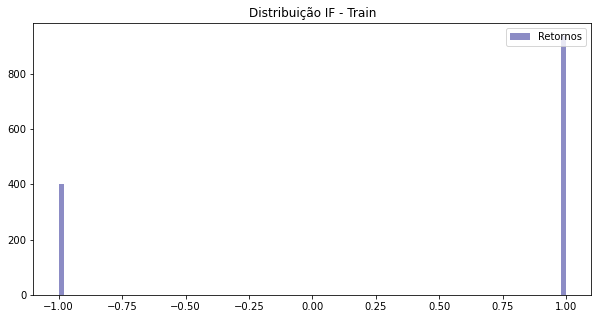

In [449]:
plt.figure(figsize = (10.,5))
plt.hist(predTrain, bins = 100
        , alpha = 0.45
        , histtype = "stepfilled"
        , color = "navy"
        , edgecolor = "none"
        , label = "Retornos")

plt.legend()
plt.title("Distribuição IF - Train");

In [450]:
predTrain = np.where(predTrain == -1, 1, 0)
predTest = np.where(predTest == -1, 1, 0)

# Passo 7 - Avaliando os resultados

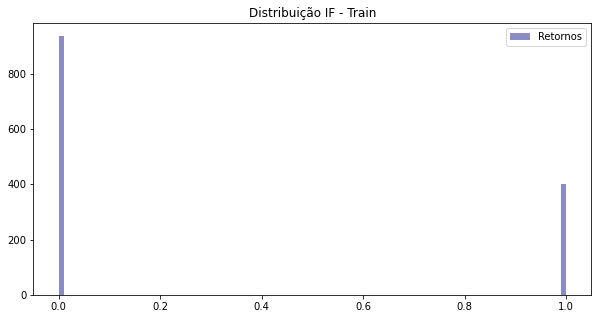

In [451]:
plt.figure(figsize = (10,5))
plt.hist(predTrain, bins = 100
        , alpha = 0.45
        , histtype = "stepfilled"
        , color = "navy"
        , edgecolor = "none"
        , label = "Retornos")

plt.legend()
plt.title("Distribuição IF - Train");

In [452]:
print(confusion_matrix(yTrain, predTrain))
print()
print("------------------------------------------------")
print()
print(classification_report(yTrain,predTrain))

print()
print("Acurácia: ", round(metrics.accuracy_score(yTrain, predTrain)*100,3))

[[470 161]
 [467 241]]

------------------------------------------------

              precision    recall  f1-score   support

           0       0.50      0.74      0.60       631
           1       0.60      0.34      0.43       708

    accuracy                           0.53      1339
   macro avg       0.55      0.54      0.52      1339
weighted avg       0.55      0.53      0.51      1339


Acurácia:  53.099


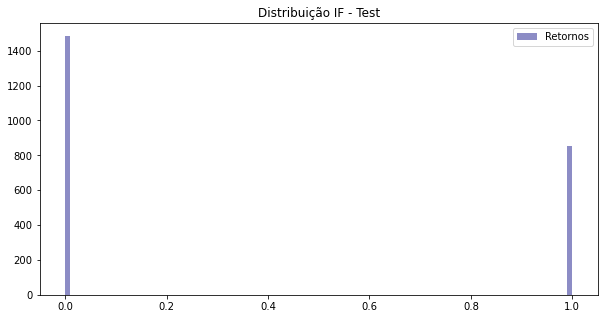

In [454]:
plt.figure(figsize = (10,5))
plt.hist(predTest, bins = 100
        , alpha = 0.45
        , histtype = "stepfilled"
        , color = "navy"
        , edgecolor = "none"
        , label = "Retornos")

plt.legend()
plt.title("Distribuição IF - Test");

In [455]:
print(confusion_matrix(yTest, predTest))
print()
print("------------------------------------------------")
print()
print(classification_report(yTest,predTest))

print()
print("Acurácia: ", round(metrics.accuracy_score(yTest, predTest)*100,3))

[[740 418]
 [745 435]]

------------------------------------------------

              precision    recall  f1-score   support

           0       0.50      0.64      0.56      1158
           1       0.51      0.37      0.43      1180

    accuracy                           0.50      2338
   macro avg       0.50      0.50      0.49      2338
weighted avg       0.50      0.50      0.49      2338


Acurácia:  50.257


In [457]:
# Salvando o modelo

import pickle
arquivo = "IF.sav"
pickle.dump(IF, open(arquivo, 'wb'))
